In [1]:
# DECLARING REQUIRED PACKAGES
import numpy as np
import math
from scipy.constants import e, m_p

# DELCARING THE CLASS Particle
from particle import Particle

# DECLARING OUR methods FILE
import methods

# DECLARING OUR 2D-Plotter FILE
import plotter

In [2]:
#============ FIXED ENERGY OF 20 MeV ==============

In [3]:
# DECLARING AN ARRAY TO STORAGE OUR PARTICLES
particles = []
n = 10 #Number of test particles

# ALPHA PARTICLE INFORMATION
m = 2*m_p
q = 2*e
E = 20*1e6 #eV

# RANGE OF POSITIONS FOR THE IMPACT PARAMETER b
y0 = 1e-1
y1 = 10e-1

# INITIAL HORIZONTAL DISTANCE TO THE PARTICLES AND THE TARGET
d = -1e-1 #meters

In [4]:
# INSTANCING OUR 10 PARTICLES
for i in range(n):
    b = methods.b(y0,y1)
    particles.append(Particle(m,q,[d,b],[np.sqrt(b**2+d**2),np.arctan2(b,d)],E,b))

In [5]:
# INSTANCING THE TARGET GOLD NUCLEUS AT THE ORIGIN
target = Particle(79*m_p,79*e,[0,0],[0,0],0,0)

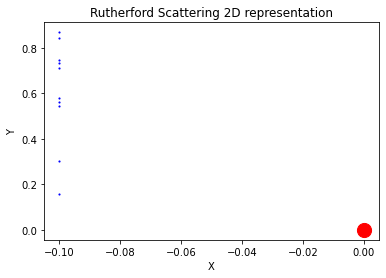

In [6]:
plotter.xyPlot(particles,target.getPositions())

In [7]:
# DEFINING INITIAL PARAMETERS FOR RK4
t1, t2, steps = 0, 0.00000001, 10000
h = abs(t2-t1)/steps

In [8]:
# MOVING THE PARTICLES USING RK4 METHOD
for particle in particles:
    theta = methods.theta(particle)
    r = methods.distance(particle, target)
    data = np.array([theta,r], float)
    for t in np.arange(t1+h,t2,h):
        data = methods.rk4(data,particle.getAngularMomentum(),m,data[1],methods.kineticEnergy(particle,target.getCharge(),data[1]),h,particle.getXPosition())
        particle.savePosition(methods.position(data[1], np.pi - data[0]))
        particle.savePositionPolar(data)
    particle.saveScatteringAngle(data[0])

/Users/rvizarreta/Google Drive/RIT myCourses/2021 Spring/PHYS-377 Advanced Computational Physics/Final Project/Code/Source/methods.py:39: RuntimeWarning: invalid value encountered in sqrt
  f_r = lambda energy, m, x : np.sqrt((2/m)*energy)


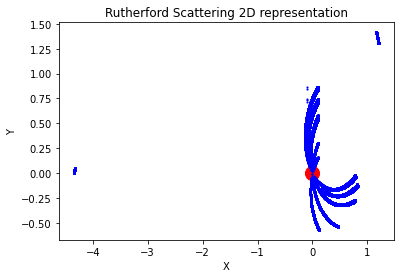

In [9]:
plotter.xyPlot(particles,target.getPositions())

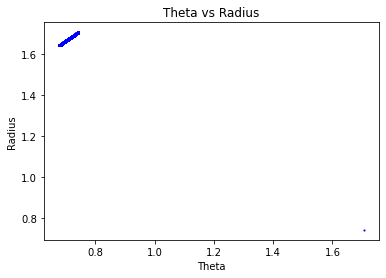

In [69]:
plotter.rThetaPlot(particles,target.getPositionsPolar())

ValueError: x and y must be the same size

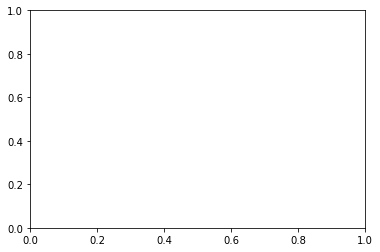

In [22]:
plotter.radiusTime(particles,np.arange(t1,t2,h))

ValueError: x and y must be the same size

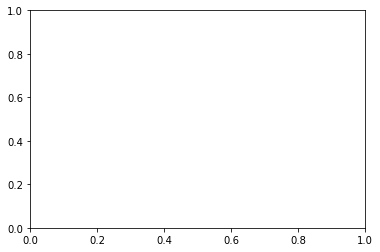

In [23]:
plotter.thetaTime(particles,np.arange(t1,t2,h))

In [79]:
methods.kineticEnergy(particles[7],target.getCharge(),particles[7].getPositionsPolar()[0])

array([1.33575579e-13, 2.97091399e-12])

In [80]:
theta = particles[0].getPositionsPolar()[:,1]
theta


array([ 1.74278004,  0.58425291,  0.58417908, ..., -0.8377349 ,
       -0.8377708 , -0.8378067 ])